<a href="https://www.kaggle.com/code/dishaasinghi/fog-prediction?scriptVersionId=126873824" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
dmetadata = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/daily_metadata.csv")
d_defog = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/defog_metadata.csv")
d_events = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/events.csv")
d_subjects = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/subjects.csv")
d_tasks = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tasks.csv")
d_tdcs = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv')
d_tdcsfog = ('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog')
d_defog_=('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog')
test_tdcsfog = ('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/test/tdcsfog')
test_defog = ('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/test/defog')

In [3]:
x = d_subjects["YearsSinceDx"]
y = d_subjects["Age"]
correlation = y.corr(x)
correlation

0.038371049196863245

# Conclusion - 1
The correlation co-efficient between the age of the patients and the years since they are having Parkinsons Disease is neglible indicating that they are hardly related to one another

<AxesSubplot:xlabel='YearsSinceDx', ylabel='Age'>

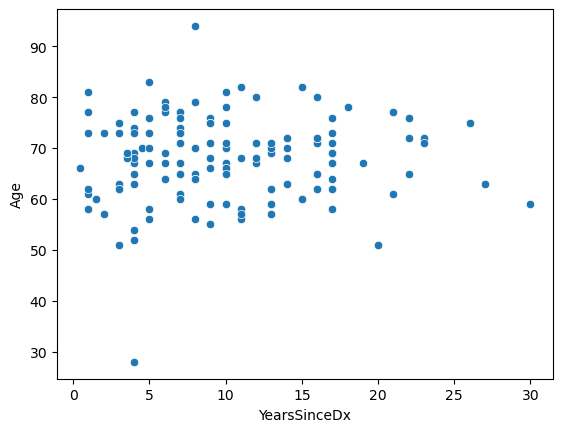

In [4]:
#Checking for correlation between the age of the patient and the number of years since they are having Parkinsons Disease
sns.scatterplot(x=x, y=y)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

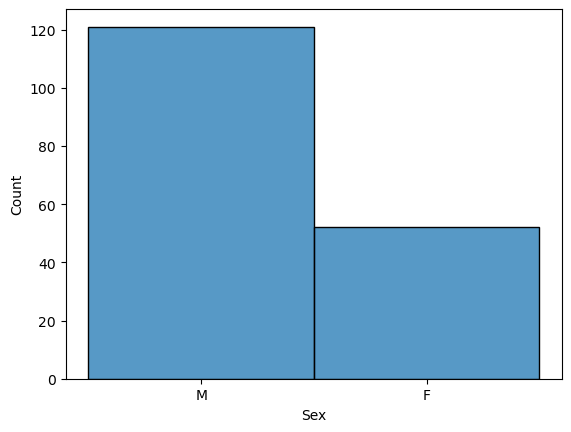

In [5]:
sns.histplot(data = d_subjects, x = 'Sex')

# Conclusion - 2
From here, we can easily conclude that the number of males in the given database is nearly 120 while the number of females is nearly 55 which is quite less

Text(0.5, 0, 'Age of the Patient')

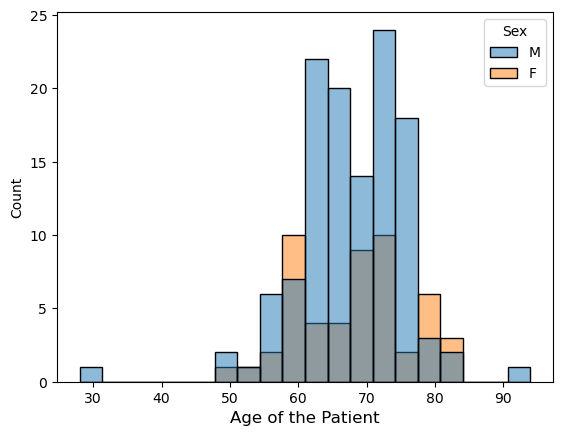

In [6]:
sns.histplot(data=d_subjects, x='Age', bins=20, hue='Sex')
plt.xlabel("Age of the Patient", size=12)

# Conclusion - 3
The age of the patients lie between 30 to 90 with the most ranging between 57-81 and the highest (nearly) between 72-75 years

Text(0.5, 0, 'Number of years since patient has Parkinsons')

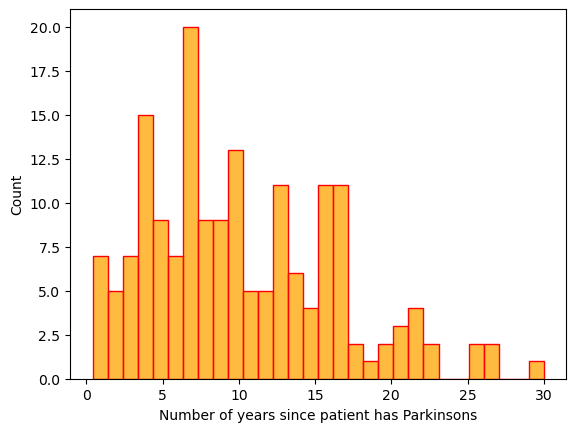

In [7]:
sns.histplot(data=d_subjects, x='YearsSinceDx', bins=30, color='orange', edgecolor ='red')
plt.xlabel("Number of years since patient has Parkinsons", size=10)

array([[<AxesSubplot:title={'center':'Visit'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'YearsSinceDx'}>,
        <AxesSubplot:title={'center':'UPDRSIII_On'}>],
       [<AxesSubplot:title={'center':'UPDRSIII_Off'}>,
        <AxesSubplot:title={'center':'NFOGQ'}>]], dtype=object)

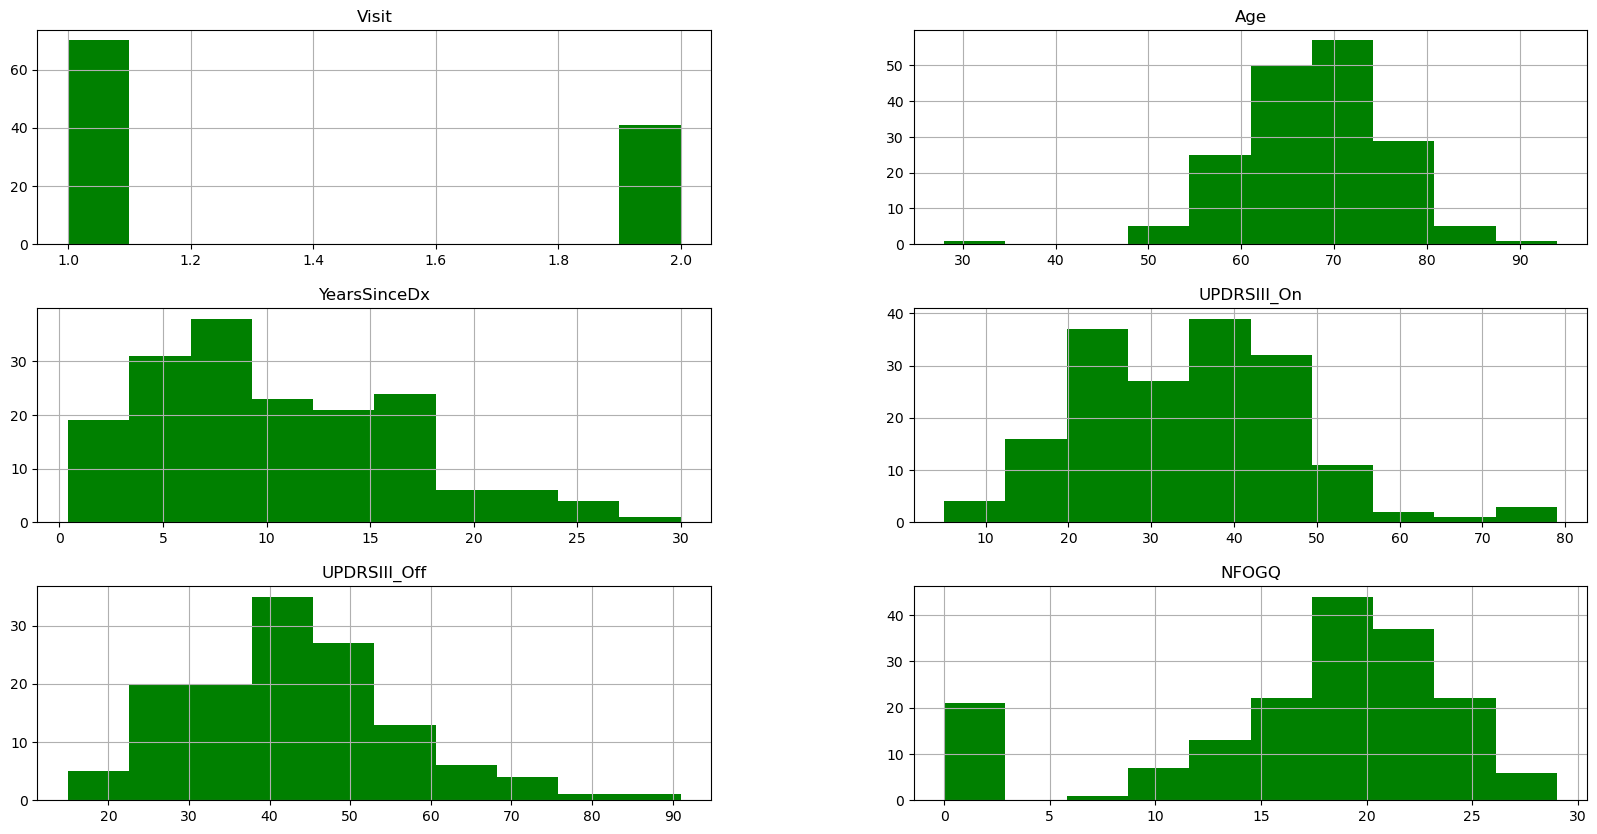

In [8]:
#To look at all the histograms at a glance in the Subjects data:
d_subjects.hist(color='green', figsize=[20,10])

In [9]:
medication_d = d_tdcs['Medication']
sum_updrs = d_subjects['UPDRSIII_Off'] 
sum_updrs2 =d_subjects['UPDRSIII_On']
d_sex = d_subjects['Sex']
sum_total = sum_updrs+sum_updrs2

Text(37.597222222222214, 0.5, 'UPDRS_On')

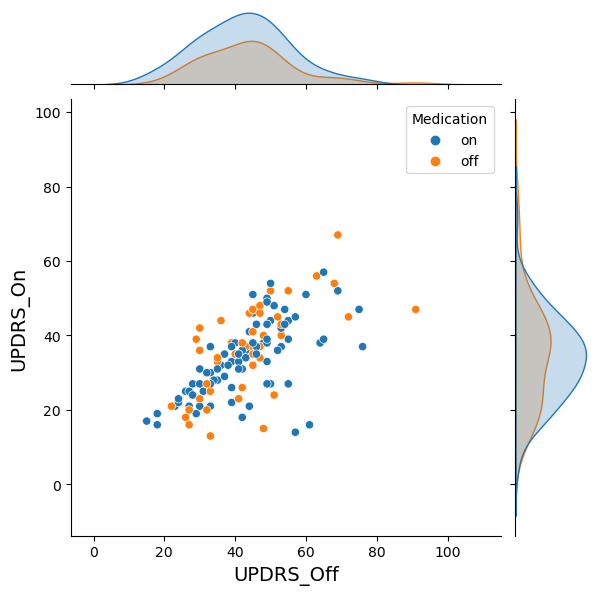

In [10]:
sns.jointplot(x=sum_updrs, y=sum_updrs2, hue=medication_d)
plt.xlabel("UPDRS_Off", size=14)
plt.ylabel("UPDRS_On", size=14)

# Conclusion - 4
1. There are definitely some outliers that are present especially when medication is off. 
2. Those having their medication off have a higher UPDRS score 


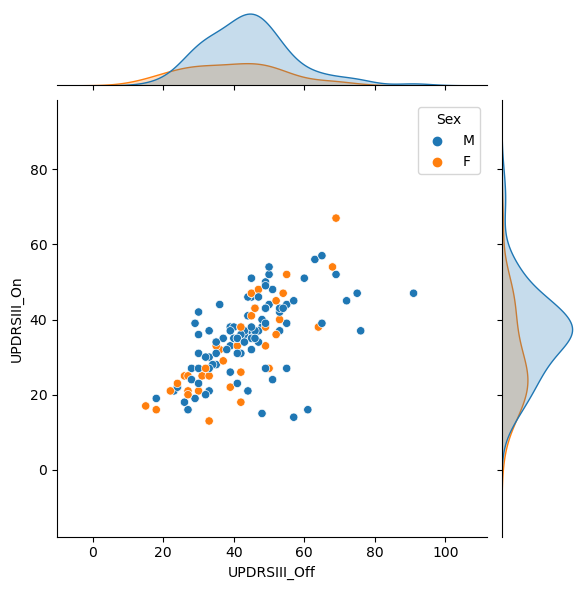

In [11]:
sns.jointplot(x=sum_updrs, y=sum_updrs2, hue=d_sex)

# Conclusion - 5
1. Majority of the men had their UPDRS score clustered in the centre
2. There were very few outliers present throughout the graph

In [12]:
d_tdcs.describe()

,Visit,Test
count,833.000000,833.000000
mean,6.460984,1.974790
std,6.171914,0.813402
min,2.000000,1.000000
25%,2.000000,1.000000
50%,4.000000,2.000000
75%,5.000000,3.000000
max,20.000000,3.000000


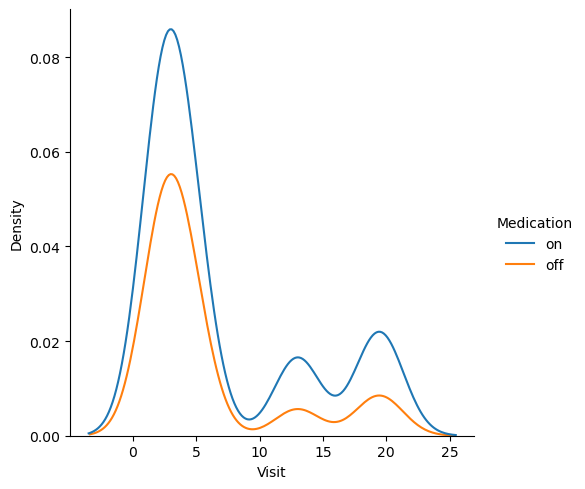

In [13]:
sns.displot(x=d_tdcs['Visit'], y=None, hue=d_tdcs['Medication'], kind='kde')

In [14]:
a = d_subjects['Sex'].value_counts()['M']
b = d_subjects['Sex'].value_counts()['F']

In [15]:
d_tdcs.replace('on', 1, inplace=True)
d_tdcs.replace('off', 0, inplace=True)
d_tdcs.head(10)

,Id,Subject,Visit,Test,Medication
0,003f117e14,13abfd,3,2,1
1,009ee11563,d81e3a,4,2,1
2,011322847a,203e85,2,2,1
3,01d0fe7266,203e85,2,1,0
4,024418ba39,cecfb8,19,3,1
5,024ba3ebd5,2f16e0,3,2,1
6,02e8454f57,cdfd76,2,2,1
7,02edc527c0,65e5a8,19,3,1
8,0330ea6680,243979,2,1,1
9,0383be6b43,4c5b10,4,3,1


In [16]:
x1 = d_tdcs['Medication']
x2= d_tdcs['Visit']
corr = x1.corr(x2)
corr
#This correlation shows that Medication and the number of visits are slightly correlated. When Medication is on, number of visits are more.

0.09992190281071654

In [17]:
start = d_events['Init']
end = d_events['Completion']
duration_total = end-start
duration_total

0        6.15998
1       29.80000
2        4.12000
3        2.20000
4        1.56000
          ...   
3707     3.10500
3708     0.15500
3709     1.50800
3710     0.99900
3711     0.79100
Length: 3712, dtype: float64

In [18]:
#Right now we need to take three datasets into consideration i.e. dmetadata, d_tdcs, d_defog. 
dmetadata.head()

,Id,Subject,Visit,Beginning of recording [00:00-23:59]
0,00c4c9313d,3d8b73,1,10:19
1,07a96f89ec,a15b56,1,07:30
2,0d1bc672a8,21e523,2,08:30
3,0e333c9833,b068a2,1,11:30
4,164adaed7b,ffa798,1,13:00


# Let us create the necessary Datasets 

In [19]:
td_list = []

for file in os.listdir(d_tdcsfog):
    if file.endswith('.csv'):
        p_file = os.path.join(d_tdcsfog, file)
        file_new = pd.read_csv(p_file)
        td_list.append(file_new)
        
tdcsfog = pd.concat(td_list, axis = 0) #Joining them row-wise

#Explaining the above code:
#Firstly, we will be traversing through the datasets in the training data of the tdcsfog data and check for files that have an extension of .csv. Post that, we will be combining the paths of both the datasets into one complete path. 

In [20]:
#The similar technique we will be using for our defog (train) dataset
dg_list=[]
for file1 in os.listdir(d_defog_):
    if file1.endswith('.csv'):
        pp_file=os.path.join(d_defog_, file1)
        files=pd.read_csv(pp_file)
        dg_list.append(files)
        
new_defog=pd.concat(dg_list, axis=0)

In [21]:
new_defog = new_defog[(new_defog['Task'] == 1) & (new_defog['Valid'] == 1)]
new_defog = new_defog.iloc[:, :7]

In [22]:
tdcsfog.shape

(7062672, 7)

In [23]:
new_defog.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
count,4.111322e+06,4.111322e+06,4.111322e+06,4.111322e+06,4.111322e+06,4.111322e+06,4.111322e+06
mean,9.113573e+04,-9.348869e-01,-1.300852e-03,-2.260192e-01,2.140431e-05,1.007900e-01,1.715288e-02
std,7.020982e+04,1.069422e-01,1.399125e-01,2.441998e-01,4.626430e-03,3.010504e-01,1.298409e-01
min,1.000000e+03,-6.024701e+00,-2.115008e+00,-5.118650e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.550000e+04,-9.850838e-01,-8.468409e-02,-3.639194e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.686400e+04,-9.390158e-01,0.000000e+00,-2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.294960e+05,-8.869410e-01,9.209929e-02,-1.135075e-01,0.000000e+00,0.000000e+00,0.000000e+00
max,4.143870e+05,4.458365e+00,4.524038e+00,4.388132e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [24]:
new_defog.columns

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'], dtype='object')

Highly Grateful to [Goki Fujiya](https://www.kaggle.com/gokifujiya) for the below code. Really helped to save memory.

In [25]:
def reduce_memory_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024 ** 2 
    print("Memory usage became: ",mem_usg," MB")
    
    return df

In [26]:
tdcsfog = reduce_memory_usage(tdcsfog)

Memory usage of dataframe is 431.07 MB
Memory usage became:  141.4452667236328  MB


In [27]:
new_defog = reduce_memory_usage(new_defog)

Memory usage of dataframe is 250.94 MB
Memory usage became:  82.33810615539551  MB


In [28]:
#Let us concat both the datasets (tdcsfog, new_defog) row-wise
df=pd.concat([new_defog, tdcsfog], axis=0)

In [29]:
df.shape

(11173994, 7)

In [30]:
X_check=df.iloc[:,1:4] #The independent variables 
#The Dependent Variables 
y1=df['StartHesitation'] 
y2=df['Turn']
y3=df['Walking']

In [31]:
y11 = np.where(y1 == 1)[0]
total = (y1 == 1).sum()
y01 = np.random.choice(np.where(y1 == 0)[0], size = total, replace = False)
y1_full = np.concatenate([y01, y11])
X1_final = X_check.iloc[y1_full, :]
y1_final = y1.iloc[y1_full]


y11_ = np.where(y2 == 1)[0]
total_ = (y2 == 1).sum()
y01_ = np.random.choice(np.where(y2 == 0)[0], size = total, replace = False)
y2_full = np.concatenate([y01_, y11_])
X2_final = X_check.iloc[y2_full, :]
y2_final = y2.iloc[y2_full]

_y11_ = np.where(y3 == 1)[0]
_total_ = (y3 == 1).sum()
_y01_ = np.random.choice(np.where(y3 == 0)[0], size = total, replace = False)
y3_full = np.concatenate([_y01_, _y11_])
X3_final = X_check.iloc[y3_full, :]
y3_final = y3.iloc[y3_full]

In [32]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_final, y1_final, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_final, y2_final, test_size=0.33, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_final, y3_final, test_size=0.33, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
#Postpruning
treemodel1=DecisionTreeClassifier(max_depth=5) 
treemodel2=DecisionTreeClassifier(max_depth=5) 
treemodel3=DecisionTreeClassifier(max_depth=5) 

In [35]:
treemodel1.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=5)

In [36]:
treemodel2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=5)

In [37]:
treemodel3.fit(X3_train, y3_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
#Apologies in advance for the visiblity of the decision trees

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.323\ngini = 0.5\nsamples = 408536\nvalue = [204484, 204052]'),
 Text(0.25, 0.75, 'X[0] <= -4.6\ngini = 0.349\nsamples = 194531\nvalue = [150650, 43881]'),
 Text(0.125, 0.5833333333333334, 'X[2] <= -0.594\ngini = 0.468\nsamples = 117115\nvalue = [73292, 43823]'),
 Text(0.0625, 0.4166666666666667, 'X[1] <= -1.271\ngini = 0.067\nsamples = 18470\nvalue = [17830, 640]'),
 Text(0.03125, 0.25, 'X[2] <= -1.128\ngini = 0.276\nsamples = 1570\nvalue = [1310, 260]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.142\nsamples = 998\nvalue = [921, 77]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.435\nsamples = 572\nvalue = [389, 183]'),
 Text(0.09375, 0.25, 'X[2] <= -1.085\ngini = 0.044\nsamples = 16900\nvalue = [16520, 380]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.017\nsamples = 13346\nvalue = [13229, 117]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.137\nsamples = 3554\nvalue = [3291, 263]'),
 Text(0.1875, 0.4166666666666667, 'X[1] <= -

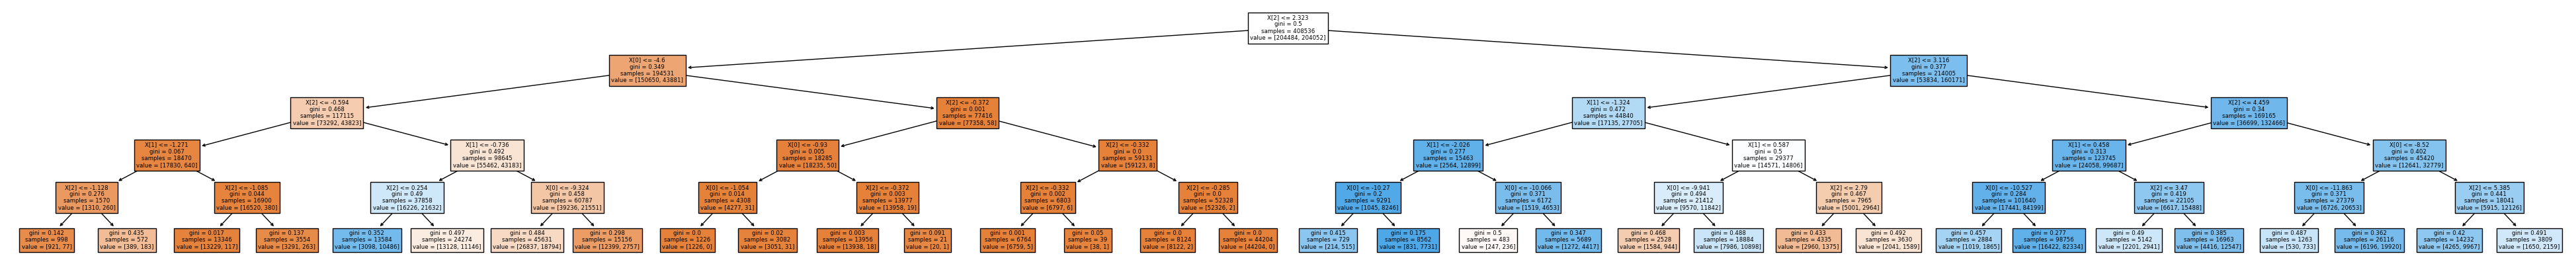

In [39]:
from sklearn import tree
plt.figure(figsize=(50,5))
tree.plot_tree(treemodel1, filled=True)
#the gini_index values are decreasing but none areleaf nodes which indicates no overfitting

[Text(0.5, 0.9166666666666666, 'X[2] <= -0.845\ngini = 0.222\nsamples = 1606686\nvalue = [204335, 1402351]'),
 Text(0.25, 0.75, 'X[1] <= -1.463\ngini = 0.309\nsamples = 23656\nvalue = [19146, 4510]'),
 Text(0.125, 0.5833333333333334, 'X[1] <= -2.343\ngini = 0.459\nsamples = 2520\nvalue = [900, 1620]'),
 Text(0.0625, 0.4166666666666667, 'X[2] <= -3.436\ngini = 0.312\nsamples = 1097\nvalue = [212, 885]'),
 Text(0.03125, 0.25, 'X[2] <= -4.994\ngini = 0.11\nsamples = 325\nvalue = [19, 306]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.029\nsamples = 201\nvalue = [3, 198]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.225\nsamples = 124\nvalue = [16, 108]'),
 Text(0.09375, 0.25, 'X[0] <= -9.566\ngini = 0.375\nsamples = 772\nvalue = [193, 579]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.258\nsamples = 427\nvalue = [65, 362]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.467\nsamples = 345\nvalue = [128, 217]'),
 Text(0.1875, 0.4166666666666667, 'X[0] <= -7.822\ngini = 0.499\n

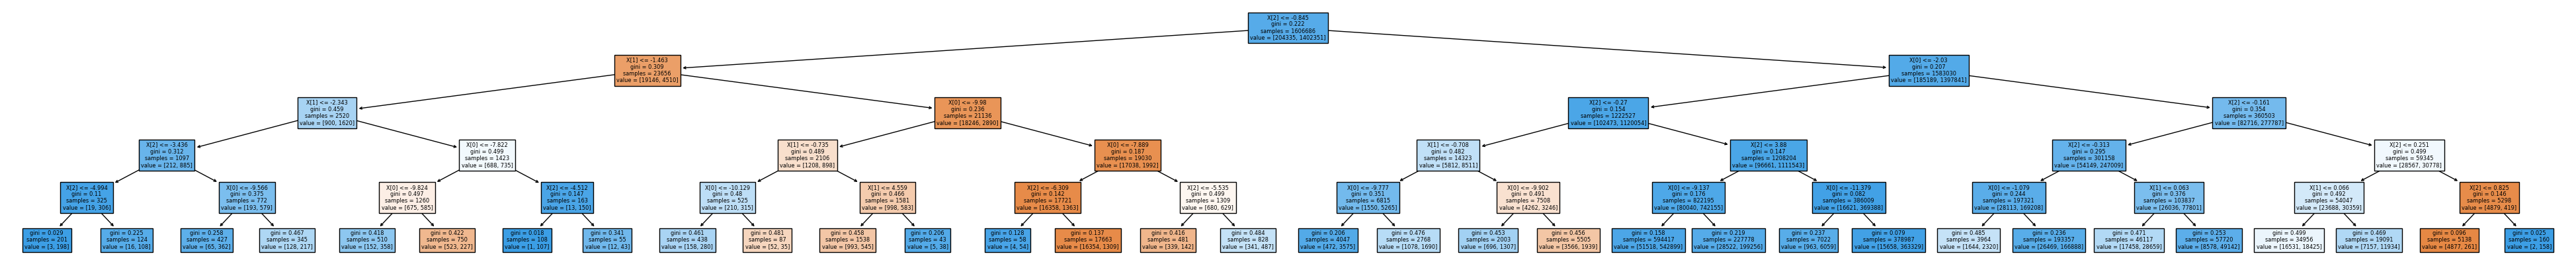

In [40]:
plt.figure(figsize=(50,5))
tree.plot_tree(treemodel2, filled=True)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.706\ngini = 0.499\nsamples = 390768\nvalue = [204458, 186310]'),
 Text(0.25, 0.75, 'X[2] <= -0.468\ngini = 0.453\nsamples = 241422\nvalue = [157716, 83706]'),
 Text(0.125, 0.5833333333333334, 'X[1] <= -1.626\ngini = 0.116\nsamples = 29798\nvalue = [27960, 1838]'),
 Text(0.0625, 0.4166666666666667, 'X[0] <= -7.537\ngini = 0.483\nsamples = 1285\nvalue = [760, 525]'),
 Text(0.03125, 0.25, 'X[1] <= -3.488\ngini = 0.454\nsamples = 1127\nvalue = [734, 393]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.422\nsamples = 152\nvalue = [46, 106]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.415\nsamples = 975\nvalue = [688, 287]'),
 Text(0.09375, 0.25, 'X[2] <= -5.24\ngini = 0.275\nsamples = 158\nvalue = [26, 132]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.237\nsamples = 153\nvalue = [21, 132]'),
 Text(0.1875, 0.4166666666666667, 'X[2] <= -0.531\ngini = 0.088\nsa

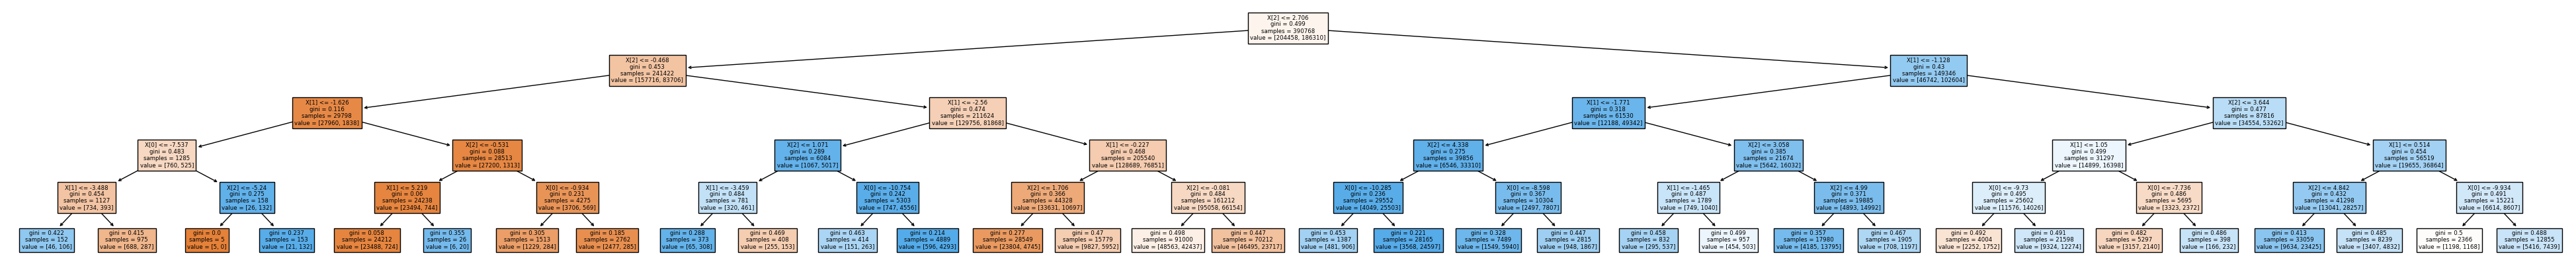

In [41]:
plt.figure(figsize=(50,5))
tree.plot_tree(treemodel3, filled=True)

In [42]:
y1_pred=treemodel1.predict(X1_test)
y2_pred=treemodel2.predict(X2_test)
y3_pred=treemodel3.predict(X3_test)

In [43]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y1_pred, y1_test)
score

0.7865023357519133

In [44]:
score = accuracy_score(y2_pred, y2_test)
score

0.8868041356965404

In [45]:
score = accuracy_score(y3_pred, y3_test)
score

0.6813824563955754

In [46]:
classification_report(y2_pred, y2_test)

'              precision    recall  f1-score   support\n\n           0       0.13      0.86      0.23     15259\n           1       1.00      0.89      0.94    776095\n\n    accuracy                           0.89    791354\n   macro avg       0.56      0.87      0.58    791354\nweighted avg       0.98      0.89      0.93    791354\n'

In [47]:
tdcs_list = []
for name in os.listdir(test_tdcsfog):
    if name.endswith('.csv'):
        path = os.path.join(test_tdcsfog, name)
        file = pd.read_csv(path)
        file['Id'] = name[:-4] + '_' + file['Time'].apply(str)
        tdcs_list.append(file)
tdcsfog2 = pd.concat(tdcs_list, axis = 0)
tdcsfog2

,Time,AccV,AccML,AccAP,Id
0,0,-9.533939,0.566322,-1.413525,003f117e14_0
1,1,-9.536140,0.564137,-1.440621,003f117e14_1
2,2,-9.529345,0.561765,-1.429332,003f117e14_2
3,3,-9.531239,0.564227,-1.415490,003f117e14_3
4,4,-9.540825,0.561854,-1.429471,003f117e14_4
...,...,...,...,...,...
4677,4677,-9.351431,0.370047,-2.286318,003f117e14_4677
4678,4678,-9.341410,0.347721,-2.321991,003f117e14_4678
4679,4679,-9.350667,0.361341,-2.297158,003f117e14_4679
4680,4680,-9.343977,0.365726,-2.292650,003f117e14_4680


In [48]:
tdcsfog2 = reduce_memory_usage(tdcsfog2)

Memory usage of dataframe is 0.18 MB
Memory usage became:  0.20650863647460938  MB


In [49]:
defoglist = []
for name in os.listdir(test_defog):
    if name.endswith('.csv'):
        path = os.path.join(test_defog, name)
        file = pd.read_csv(path)
        file['Id'] = name[:-4] + '_' + file['Time'].apply(str)
        defoglist.append(file)
defog2 = pd.concat(defoglist, axis = 0)
defog2

,Time,AccV,AccML,AccAP,Id
0,0,-0.914652,-0.300851,0.298156,02ab235146_0
1,1,-0.914367,-0.301572,0.298325,02ab235146_1
2,2,-0.779540,-0.343197,0.275690,02ab235146_2
3,3,-0.993162,-0.270281,0.315775,02ab235146_3
4,4,-0.948767,-0.307849,0.297191,02ab235146_4
...,...,...,...,...,...
281683,281683,-0.899299,-0.232668,0.389147,02ab235146_281683
281684,281684,-0.901973,-0.233051,0.390114,02ab235146_281684
281685,281685,-0.901690,-0.231888,0.391896,02ab235146_281685
281686,281686,-0.899576,-0.232429,0.391106,02ab235146_281686


In [50]:
defog2 = reduce_memory_usage(defog2)

Memory usage of dataframe is 10.75 MB
Memory usage became:  13.972709655761719  MB


In [51]:
new_df = pd.concat([tdcsfog2, defog2], axis = 0).reset_index(drop = True)
new_df

,Time,AccV,AccML,AccAP,Id
0,0,-9.531250,0.566406,-1.413086,003f117e14_0
1,1,-9.539062,0.563965,-1.440430,003f117e14_1
2,2,-9.531250,0.561523,-1.429688,003f117e14_2
3,3,-9.531250,0.564453,-1.415039,003f117e14_3
4,4,-9.539062,0.562012,-1.429688,003f117e14_4
...,...,...,...,...,...
286365,281683,-0.899414,-0.232666,0.389160,02ab235146_281683
286366,281684,-0.901855,-0.233032,0.390137,02ab235146_281684
286367,281685,-0.901855,-0.231934,0.391846,02ab235146_281685
286368,281686,-0.899414,-0.232422,0.391113,02ab235146_281686


In [52]:
new_test = new_df.iloc[:, 1:4]

In [53]:
y1_p = treemodel1.predict(new_test)
y2_p = treemodel2.predict(new_test)
y3_p = treemodel3.predict(new_test)

In [54]:
new_df['StartHesitation'] = y1_p
new_df['Turn'] = y2_p 
new_df['Walking'] = y3_p

In [55]:
new_df

,Time,AccV,AccML,AccAP,Id,StartHesitation,Turn,Walking
0,0,-9.531250,0.566406,-1.413086,003f117e14_0,0,0,0
1,1,-9.539062,0.563965,-1.440430,003f117e14_1,0,0,0
2,2,-9.531250,0.561523,-1.429688,003f117e14_2,0,0,0
3,3,-9.531250,0.564453,-1.415039,003f117e14_3,0,0,0
4,4,-9.539062,0.562012,-1.429688,003f117e14_4,0,0,0
...,...,...,...,...,...,...,...,...
286365,281683,-0.899414,-0.232666,0.389160,02ab235146_281683,0,0,0
286366,281684,-0.901855,-0.233032,0.390137,02ab235146_281684,0,0,0
286367,281685,-0.901855,-0.231934,0.391846,02ab235146_281685,0,0,0
286368,281686,-0.899414,-0.232422,0.391113,02ab235146_281686,0,0,0


In [56]:
submission=new_df.iloc[:, 4:].fillna(0.0)

In [57]:
submission.to_csv("submission.csv", index=False)

In [58]:
submission

,Id,StartHesitation,Turn,Walking
0,003f117e14_0,0,0,0
1,003f117e14_1,0,0,0
2,003f117e14_2,0,0,0
3,003f117e14_3,0,0,0
4,003f117e14_4,0,0,0
...,...,...,...,...
286365,02ab235146_281683,0,0,0
286366,02ab235146_281684,0,0,0
286367,02ab235146_281685,0,0,0
286368,02ab235146_281686,0,0,0
